<h1>XTern Work Sample</h1>
<h2>FoodieX - The Best Food Delivery Service in Town</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D

We have been given a data set with restaurant information. The data set contains Restaurant ID, Latitude, Longitude, Cuisines, Average Cost, Minimum Order, Rating, Votes, Reviews, and Cook Time. To draw conclusions from the dataset in order to optimise our delivery service, we first need to load our dataset into the python notebook in a well formatted way. The pandas library does the trick!

In [2]:
# read in the dataset
df = pd.read_csv("2020-XTern-DS.csv")
# show first 5 rows of dataset
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


As we can see, our data is beautifully formatted thanks to the pandas library and is ready to use!

<h3>Optimal Pickup Points for FoodieX</h3>


One of the first things we can start looking into is the locations of the restaurants across the city to optimise FoodieX Pickup Locations. We can create a density plot that shows the density (or number) of restaurants at a particular location. We use the seaborn library for their extensive collection of plots

Text(0.5, 1.0, 'Restaurant Location Density Map')

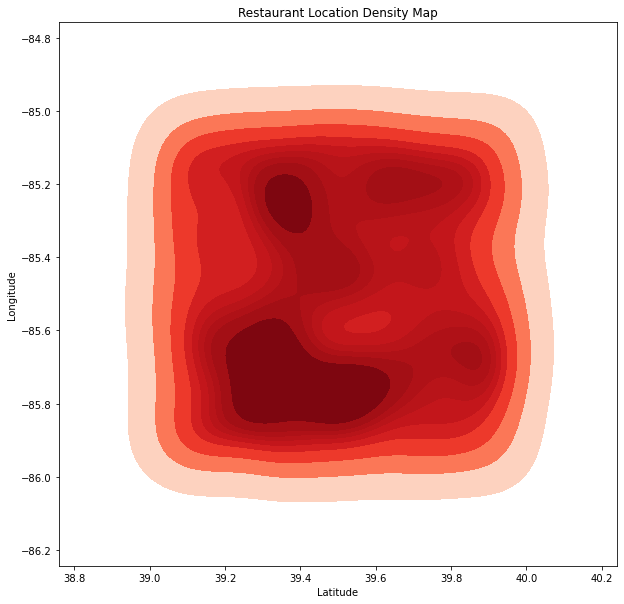

In [3]:
# set figure size
plt.figure(figsize=(10,10))
# create density plot using location attributes from dataset
sns.kdeplot(x=df['Latitude'], y=df['Longitude'], cmap="Reds", shade=True)
plt.title("Restaurant Location Density Map")

We can see that the more densely packed areas are represented by a darker shade of red. These areas are the focus areas where our service should maximise number of pickup locations in order to incorporate as many restaurants as possible without compromising on time being taken to process orders.

We can also create a 3D density plot that makes it even more clear where the focus areas are and how many restaurants there are in those areas!

Text(0.5, 0, 'Longitude')

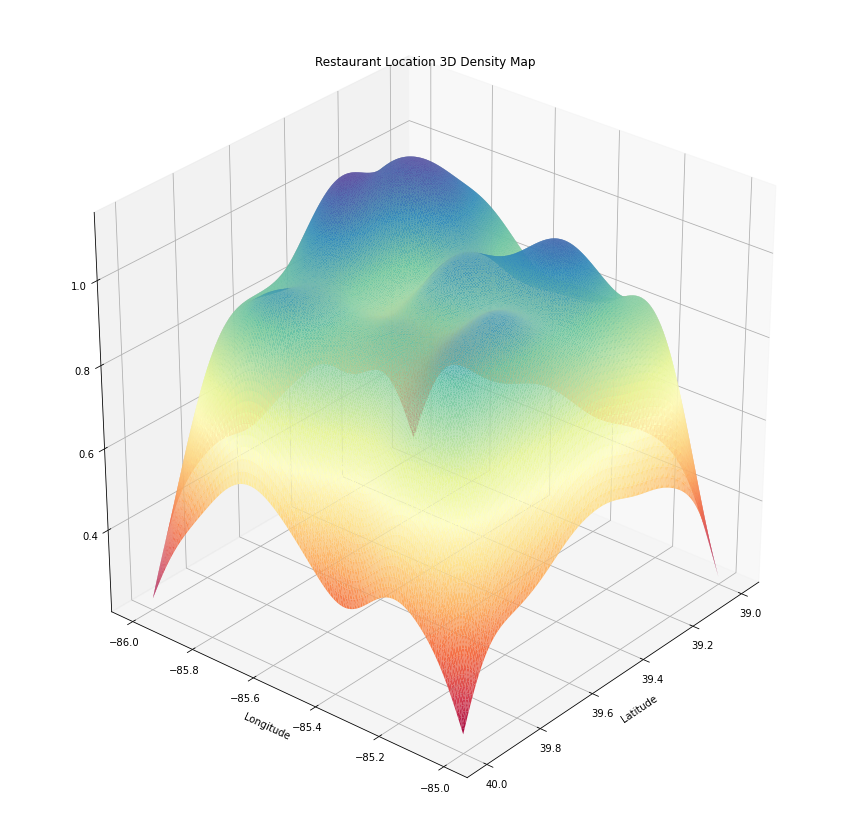

In [4]:
# Assign number of bins 
nbins=200

# Optimise and normalise our dataset to create a 3d plot. 
k = kde.gaussian_kde([df['Latitude'],df['Longitude']])
xi, yi = np.mgrid[ df['Latitude'].min():df['Latitude'].max():nbins*1j, df['Longitude'].min():df['Longitude'].max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
ax.view_init(30, 40)
plt.title("Restaurant Location 3D Density Map")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

As we can see from the plot, the higher the peak on the z-axis, the more restaurants at that particular location. If our service is just starting up, these are the locations that we would want to start serving first.

To figure out where we can place our pickup spots, we can use the locations of the restaurants and figure out how near they are to other restaurants. This will give us an even better understanding of where exactly the hotspots are. For this we calculate each restaurant's distance from all other restaurants, and count how many restaurants are within a specific radius of that restaurant. We choose a radius value of 0.05 and use the scipy spatial library to calculate distances in a very easy and readable way.

In [5]:
from scipy.spatial import distance_matrix

In [6]:
# Create an array of the locations of the restaurants
foo = np.array([(x,y) for x, y in zip(df.Latitude, df.Longitude)])
# create a distance matrix
baz = distance_matrix(foo, foo)
# count number of restaurants within radius
lst = [len(i[i < 0.05]) for i in baz]

We can add this data into our dataset for future use if needed

In [7]:
df['Points_within_radius'] = lst

Our dataset now looks like this, it has a new column that shows number of restaurants within radius

In [8]:
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Points_within_radius
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,27
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,10
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,17
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,14
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,15


We can call a restaurant (or location) a hotspot if there are more than 20 restaurants withing its radius. This will help us determine exact locations of our pickup points.

In [9]:
# create subdataframe with hotspot restaurants
hotspots = df[df.Points_within_radius >= 20]

We can now combine our density plot from before with a plot of locations of hotspots for a conclusive representation of pickup spots 

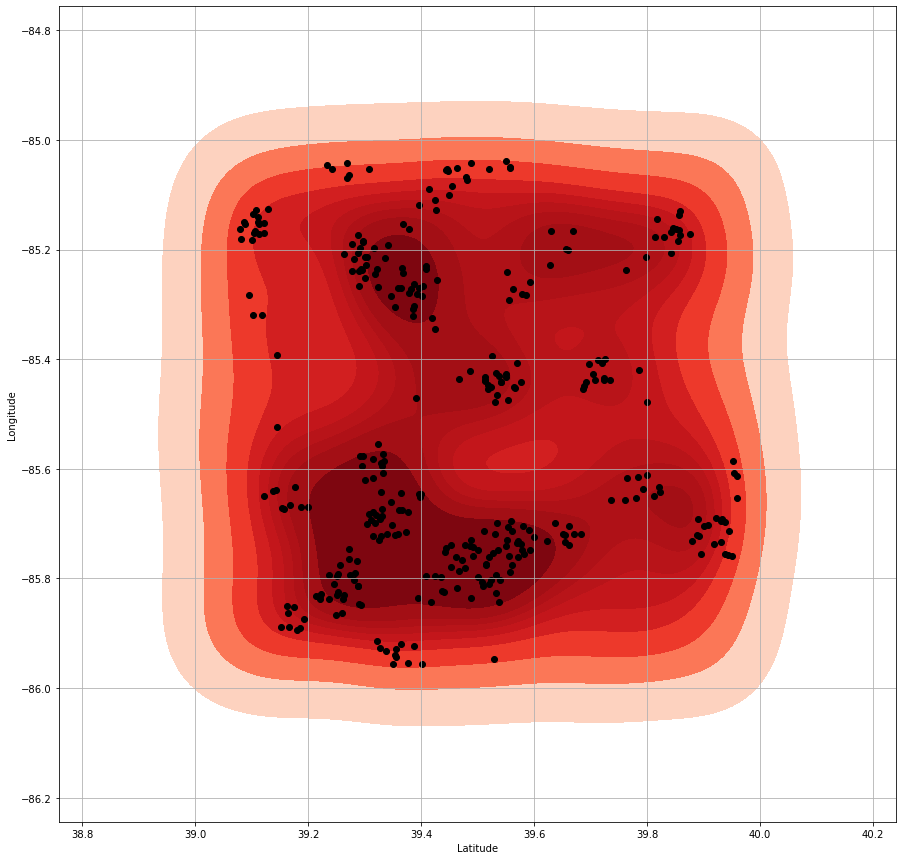

In [10]:
plt.figure(figsize=(15,15))
sns.kdeplot(x=df['Latitude'], y=df['Longitude'], cmap="Reds", shade=True)
plt.scatter(hotspots.Latitude, hotspots.Longitude, color='black')
plt.grid()

This helps us prioritise areas and gives us specific locations for our pickup points. We have successfully derived optimal locations for our pickup service

<h3>Top Cuisines</h3>


Next we can try to determine the best cuisines - our dataset contains a host of different cuisines! We can start by creating a set of all possible cuisines served by restaurants in our dataset.

In [11]:
cuisines = set()
for i in df.Cuisines:
    cuisines |= set(j.strip() for j in i.split(','))

To derive conclusions and rate restaurants and cuisines, we need to convert the string data into numbers to allow calculative operations. The to_numeric method does the trick. 

In [12]:
df.Rating = pd.to_numeric(df.Rating, errors='coerce')
df.Votes = pd.to_numeric(df.Votes, errors='coerce')
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')

We need to come up with a scoring mechanism that can rate our restaurants in a fair way while simultaneously comparing them to other restaurants. Since a review takes more effort than a vote, it should have a higher weight when calculating a score. The number of votes and reviews can be a good indication of how popular a restaurant is - it shows how many people visit that restaurant! We need to weigh each restaurant's number of votes and reviews in order to create our mechanism. This can be done using the following equation:

$Score = sin( \frac{rating}{ 5}) * sin ( \frac{votes} {highest  votes}) + (2 * sin (\frac{rating} {5}) * sin(\frac{reviews} {highest  reviews}))$

We can multiply our score by 100 for better readability

In [13]:
# add score to dataset
df['Score'] = ((np.sin(df.Rating/5) * np.sin(df.Votes/max(df.Votes))) + (2 * np.sin(df.Rating/5) * np.sin(df.Reviews/max(df.Reviews)))) * 100
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Points_within_radius,Score
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12.0,4.0,30 minutes,27,0.164623
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11.0,4.0,30 minutes,10,0.157508
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99.0,30.0,65 minutes,17,1.329269
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176.0,95.0,30 minutes,14,3.280374
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521.0,235.0,65 minutes,15,7.749171
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,NaN,NaN,NaN,30 minutes,17,NaN
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118.0,91.0,30 minutes,15,2.998752
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NaN,NaN,NaN,30 minutes,14,NaN
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,NaN,NaN,NaN,30 minutes,19,NaN


Now we can derive top cuisines by looking at how restauranrt that serve that cuisine score. We can calculate a median score for all restaurant that serve that cuisine and a weighted score for comparision with other cuisines.

C:\Users\Nikit Parakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Text(0, 0.5, 'Median Score')

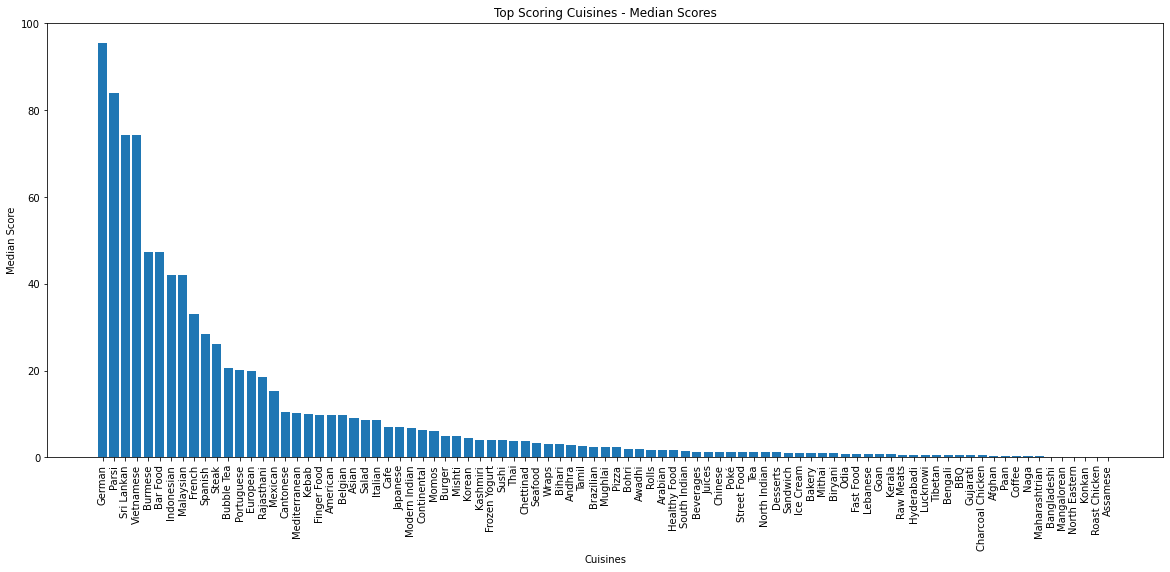

In [14]:
# create separate dataset for each cuisine
cuisine_dict = {i : None for i in cuisines}
for key in cuisine_dict.keys():
    cuisine_dict[key] = df[df.Cuisines.str.contains(key)]

cuisine_data_dict = {i : {} for i in cuisines}

# calculate median score using numpy function and a weighted median score using ratio of restaurants that serve that cuisine
for key, value in cuisine_dict.items():
    cuisine_data_dict[key]['Median Score'] = value.Score.median() if not np.isnan(value.Score.median()) else 0;
    cuisine_data_dict[key]['Popularity'] = cuisine_data_dict[key]['Median Score'] * np.sin(value.Rating.count()/df.Rating.count());

# we can now create a bar plot that shows the scores of each cuisine and helps us identify which cuisines score the highest
top_scoring_cuisines = sorted(list(cuisine_data_dict), key=lambda x: cuisine_data_dict[x]['Median Score'], reverse=True)
top_scoring_cuisines_plot = []
for i in top_scoring_cuisines:
    top_scoring_cuisines_plot.append((i, cuisine_data_dict[i]['Median Score']))
top_scoring_cuisines_plot
cuisine, score = zip(*top_scoring_cuisines_plot)

fig = plt.figure(1, [20, 8])
ax = fig.add_subplot(111)
plt.bar(cuisine, score);
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical');
plt.title("Top Scoring Cuisines - Median Scores")
plt.xlabel("Cuisines")
plt.ylabel("Median Score")

<h3>Most popular cuisines</h3>

While median score is good representation of how well a cuisine does, it does not show how popular it is. We use the popularity score we calculated above to see what the most popular cuisines are

In [15]:
most_popular_cuisines = sorted(list(cuisine_data_dict), key=lambda x: cuisine_data_dict[x]['Popularity'], reverse=True)

Text(0, 0.5, 'Popularity Score')

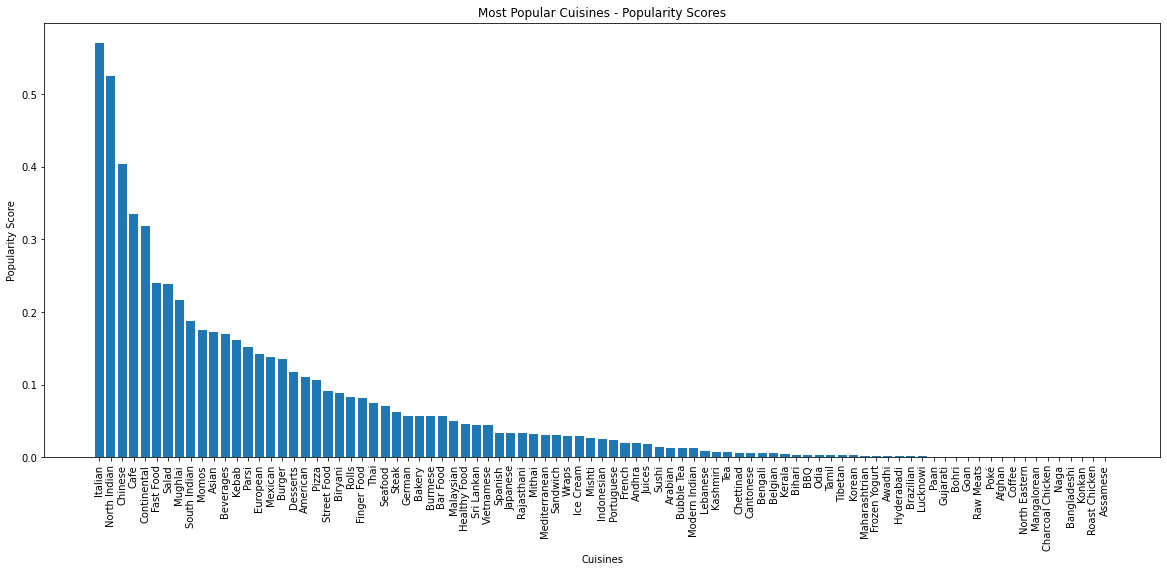

In [16]:
most_popular_cuisines_plot = []
for i in most_popular_cuisines:
    most_popular_cuisines_plot.append((i, cuisine_data_dict[i]['Popularity']))
cuisine, score = zip(*most_popular_cuisines_plot)

fig = plt.figure(1, [20, 8])
ax = fig.add_subplot(111)
plt.bar(cuisine, score);
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical');
plt.title("Most Popular Cuisines - Popularity Scores")
plt.xlabel("Cuisines")
plt.ylabel("Popularity Score")

<h3>Top 100 Restaurants</h3>
We can now look at the top 100 restaurants in our dataset and establish a threshold and criteria for a restaurant to be a top 100 restaurants. We can do this by creating a bar plot of the top 100 restaurants and their scores.

Text(0, 0.5, 'Score')

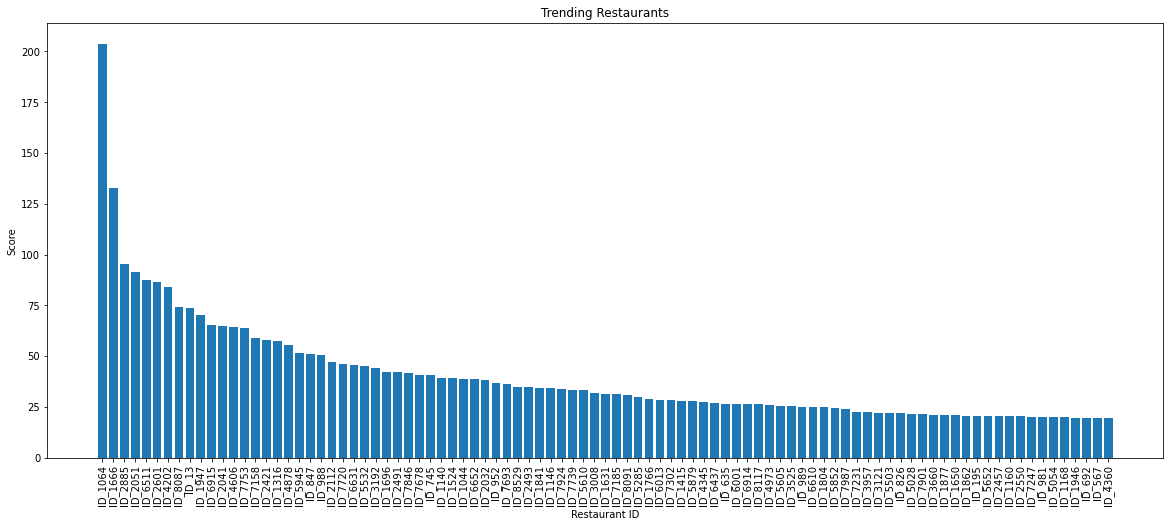

In [17]:
top_restaurants = df.sort_values(by=['Score'], ascending=False)
top_100 = top_restaurants.iloc[:100,:]

fig = plt.figure(1, [20, 8])
ax = fig.add_subplot(111)
plt.bar(top_100.Restaurant, top_100.Score);
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical');
plt.title("Trending Restaurants")
plt.xlabel("Restaurant ID")
plt.ylabel("Score")

As we can see, a restaurant needs a score of about 25 to be called a top restaurant. We can now start looking at what cuisines those restaurants serve

<h3> Cuisine Statistics </h3>

In [18]:
cuisines = set()
for i in top_100.Cuisines:
    cuisines |= set(j.strip() for j in i.split(','))

In [19]:
top_100_rest_cuisine = {i : [] for i in cuisines}
for key in top_100_rest_cuisine.keys():
    number = len(top_100[top_100.Cuisines.str.contains(key)])
    total = len(df[df.Cuisines.str.contains(key)])
    top_100_rest_cuisine[key].append(number)
    top_100_rest_cuisine[key].append(round(number*100/total, 2))

We can plot how many restaurants in the top 100 serve a particular cuisine and the percent of restaurants that end up in the top 100

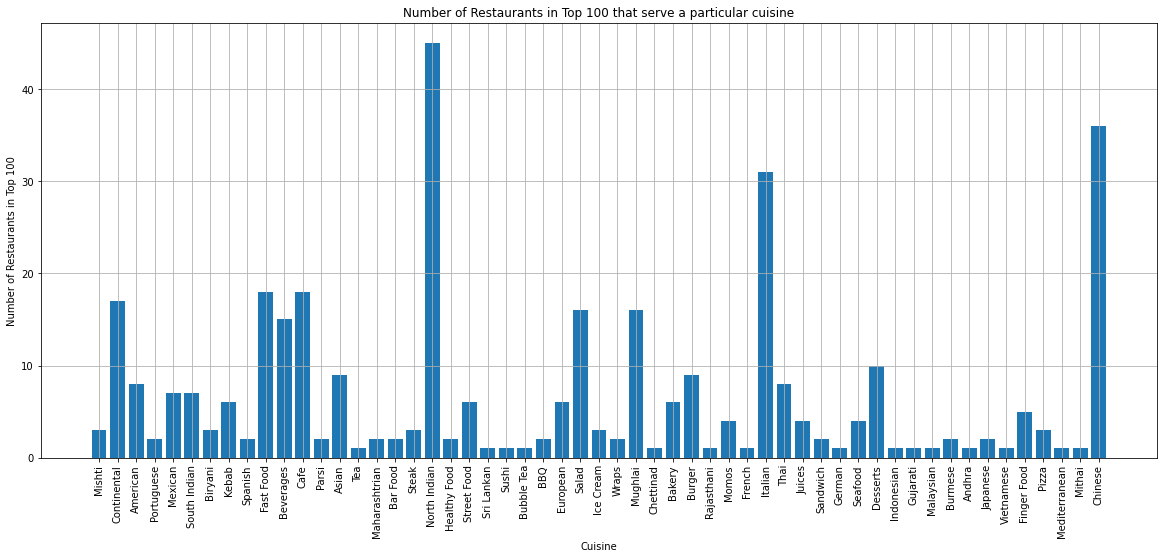

In [20]:
fig = plt.figure(1, [20, 8])
ax = fig.add_subplot(111)
plt.bar(top_100_rest_cuisine.keys(), [i[0] for i in top_100_rest_cuisine.values()])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical');
plt.title("Number of Restaurants in Top 100 that serve a particular cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants in Top 100")
plt.grid()

We can conclude that North Indian restaurants make up a larg portion of the top 100 followed by Chinese and Italian

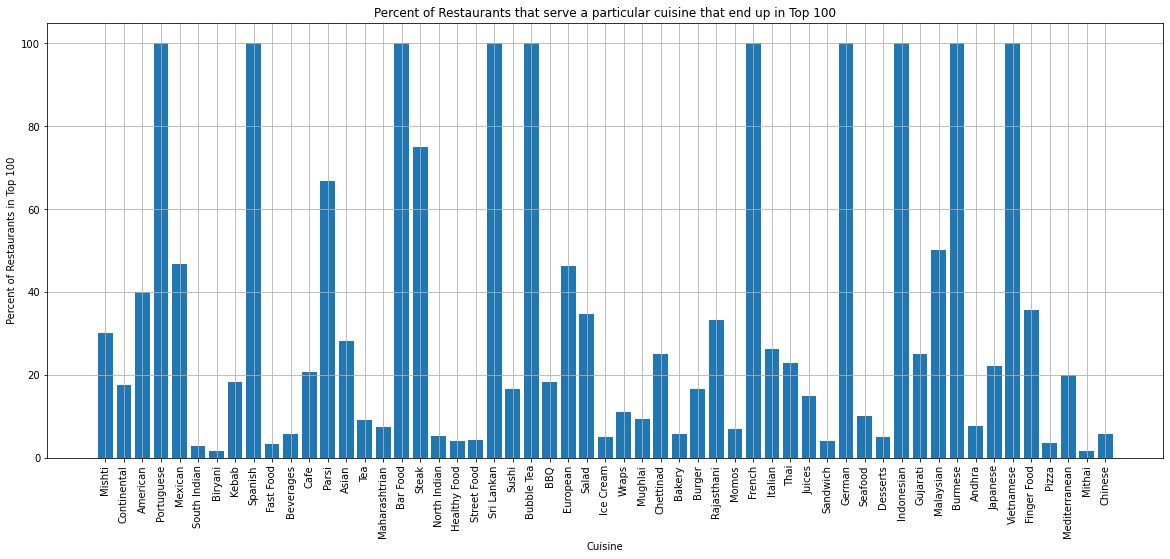

In [21]:
fig = plt.figure(1, [20, 8])
ax = fig.add_subplot(111)
plt.bar(top_100_rest_cuisine.keys(), [i[1] for i in top_100_rest_cuisine.values()])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical');
plt.title("Percent of Restaurants that serve a particular cuisine that end up in Top 100")
plt.xlabel("Cuisine")
plt.ylabel("Percent of Restaurants in Top 100")
plt.grid()

This helps us realise what the chances are for a restaurant serving a particular cuisines to end up in the top 100 and can suggest cuisines and restaurants accordingly.

<h2>The End!</h2>